# E-Commerce Customer Churn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

C:\Users\vieri\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# 1. Data Exploration

**Import data**

In [2]:
data=pd.read_csv("Data ECommerce.csv", sep=';')

In [3]:
data.shape

(3941, 11)

In [4]:
data

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.8,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.6,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


In [5]:
data.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   object 
 10  Churn                     3941 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 338.8+ KB


**Missing Values**

In [7]:
data.isna().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

In [8]:
data = data[data['CashbackAmount'].apply(lambda x: len(str(x))<=6)]

In [9]:
data

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.8,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.6,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


In [10]:
data['CashbackAmount'] = data['CashbackAmount'].astype('float')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3633 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3528 non-null   float64
 1   WarehouseToHome           3555 non-null   float64
 2   NumberOfDeviceRegistered  3633 non-null   int64  
 3   PreferedOrderCat          3633 non-null   object 
 4   SatisfactionScore         3633 non-null   int64  
 5   MaritalStatus             3633 non-null   object 
 6   NumberOfAddress           3633 non-null   int64  
 7   Complain                  3633 non-null   int64  
 8   DaySinceLastOrder         3448 non-null   float64
 9   CashbackAmount            3633 non-null   float64
 10  Churn                     3633 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 340.6+ KB


In [12]:
data

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


In [13]:
data[data.duplicated()]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
70,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
128,1.0,10.0,4,Mobile Phone,1,Single,3,1,1.0,140.69,1
194,18.0,26.0,3,Laptop & Accessory,3,Single,9,0,1.0,148.50,0
253,19.0,6.0,3,Fashion,5,Married,2,0,7.0,204.53,0
289,16.0,36.0,4,Laptop & Accessory,3,Married,4,0,3.0,170.56,0
...,...,...,...,...,...,...,...,...,...,...,...
3930,22.0,17.0,3,Laptop & Accessory,1,Single,4,0,4.0,145.07,0
3932,20.0,15.0,5,Laptop & Accessory,5,Married,10,1,8.0,171.15,0
3934,10.0,25.0,3,Laptop & Accessory,3,Married,4,0,2.0,157.68,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0


In [14]:
data = data.drop_duplicates()
data = data.reset_index()
data = data.drop('index', axis=1)
data

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
2995,14.0,18.0,3,Mobile Phone,2,Divorced,4,1,0.0,147.66,0
2996,26.0,7.0,4,Grocery,1,Married,4,0,9.0,295.99,0
2997,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
2998,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0


In [15]:
data['Churn'].value_counts()/len(data)

0    0.842
1    0.158
Name: Churn, dtype: float64

In [16]:
data.isna().sum()/len(data)*100

Tenure                      2.700000
WarehouseToHome             2.133333
NumberOfDeviceRegistered    0.000000
PreferedOrderCat            0.000000
SatisfactionScore           0.000000
MaritalStatus               0.000000
NumberOfAddress             0.000000
Complain                    0.000000
DaySinceLastOrder           5.100000
CashbackAmount              0.000000
Churn                       0.000000
dtype: float64

In [17]:
## OUTLIER CASHBACK

cashback = data[['CashbackAmount']].describe()
cashback

,CashbackAmount
count,3000.000000
mean,178.817003
std,48.716673
min,0.000000
25%,147.667500
50%,165.000000
75%,194.312500
max,324.990000


In [18]:
q3 = cashback['CashbackAmount']['75%']
q1 = cashback['CashbackAmount']['25%']
iqr = q3-q1

In [19]:
ub = q3 + 1.5*iqr
lb = q1 - 1.5*iqr

print('ub:', ub)
print('lb:', lb)

ub: 264.28000000000003
lb: 77.69999999999997


In [20]:
data = data[(data['CashbackAmount']<=ub) & (data['CashbackAmount']>=lb)]

In [21]:
data.isna().sum()/len(data)*100

Tenure                      3.005566
WarehouseToHome             2.374768
NumberOfDeviceRegistered    0.000000
PreferedOrderCat            0.000000
SatisfactionScore           0.000000
MaritalStatus               0.000000
NumberOfAddress             0.000000
Complain                    0.000000
DaySinceLastOrder           5.677180
CashbackAmount              0.000000
Churn                       0.000000
dtype: float64

In [22]:
data

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
5,7.0,16.0,4,Mobile Phone,2,Divorced,2,0,11.0,152.81,0
...,...,...,...,...,...,...,...,...,...,...,...
2994,6.0,11.0,4,Fashion,1,Married,5,0,2.0,171.19,0
2995,14.0,18.0,3,Mobile Phone,2,Divorced,4,1,0.0,147.66,0
2997,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
2998,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0


# 2. Variable and Target Determination and Splitting the Data Into Train and Test 

In [23]:
data.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

In [24]:
data

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
5,7.0,16.0,4,Mobile Phone,2,Divorced,2,0,11.0,152.81,0
...,...,...,...,...,...,...,...,...,...,...,...
2994,6.0,11.0,4,Fashion,1,Married,5,0,2.0,171.19,0
2995,14.0,18.0,3,Mobile Phone,2,Divorced,4,1,0.0,147.66,0
2997,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
2998,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0


In [25]:
data = data.dropna(axis=0)
data = data.reset_index()
data.drop('index', axis=1, inplace=True)
data

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,7.0,16.0,4,Mobile Phone,2,Divorced,2,0,11.0,152.81,0
4,1.0,15.0,6,Mobile Phone,5,Divorced,3,0,2.0,149.51,0
...,...,...,...,...,...,...,...,...,...,...,...
2392,6.0,11.0,4,Fashion,1,Married,5,0,2.0,171.19,0
2393,14.0,18.0,3,Mobile Phone,2,Divorced,4,1,0.0,147.66,0
2394,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
2395,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0


In [26]:
X = data[['Tenure', 'WarehouseToHome', 'SatisfactionScore', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']]

y = data['Churn']


In [27]:
X

,Tenure,WarehouseToHome,SatisfactionScore,Complain,DaySinceLastOrder,CashbackAmount
0,15.0,29.0,3,0,7.0,143.32
1,7.0,25.0,1,0,7.0,129.29
2,27.0,13.0,1,0,7.0,168.54
3,7.0,16.0,2,0,11.0,152.81
4,1.0,15.0,5,0,2.0,149.51
...,...,...,...,...,...,...
2392,6.0,11.0,1,0,2.0,171.19
2393,14.0,18.0,2,1,0.0,147.66
2394,28.0,9.0,3,0,1.0,231.86
2395,8.0,7.0,2,0,4.0,157.80


In [28]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2392    0
2393    0
2394    0
2395    0
2396    0
Name: Churn, Length: 2397, dtype: int64

In [29]:
## TRAIN-TEST SPLITTING

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=2024, stratify=y, test_size=0.2)

# 3. Pre-processing

In [30]:
data['Tenure'].unique()

array([15.,  7., 27.,  1., 11., 17., 16.,  6., 10.,  8., 19.,  0.,  3.,
        5.,  9., 18., 12., 30.,  4., 24., 13., 14., 25.,  2., 21., 29.,
       26., 31., 22., 20., 28., 23., 51., 50.])

In [31]:
## PREPROC
num_col = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']
cat_ohe = ['SatisfactionScore']
cat_bin = ['Complain']

numeric = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_ohe = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

categorical_bin = Pipeline(steps=[
    ('bin', BinaryEncoder())
])

## CREATING PREPROCESSOR
preproc = ColumnTransformer(
    transformers=[
        ('num', numeric, num_col),
        ('cat1', categorical_ohe, cat_ohe),
        ('cat2', categorical_bin, cat_bin)], 
        remainder='passthrough')




In [32]:
preproc

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'DaySinceLastOrder', 'CashbackAmount']),
                                ('cat1',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 ['SatisfactionScore']),
                                ('cat2',
                                 Pipeline(steps=[('bin', BinaryEncoder())]),
                                 ['Complain'])])

# 4. Model Benchmarking

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
svc = SVC(kernel='linear')
lr = LogisticRegression(solver='liblinear', random_state=2024)
rf = RandomForestClassifier()
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)

models = [knn, svc, lr, rf, tree]

In [34]:
acc = []
prec = []
rec = []
f1 = []
f2 = []

In [35]:
## RESAMPLING
rus = RandomUnderSampler()

xunder, yunder = rus.fit_resample(Xtrain, ytrain)

In [36]:
ytrain.value_counts()

0    1609
1     308
Name: Churn, dtype: int64

In [37]:
yunder.value_counts()

0    308
1    308
Name: Churn, dtype: int64

In [38]:
## MODEL SET

skfold = StratifiedKFold(n_splits=5)

for i in models: 
    benchmod = Pipeline([
        ('pre', preproc),
        ('Model', i)
    ])

    acc_cv = cross_val_score(benchmod, xunder, yunder, cv=skfold, scoring='accuracy')
    prec_cv = cross_val_score(benchmod, xunder, yunder, cv=skfold, scoring='precision')
    rec_cv = cross_val_score(benchmod, xunder, yunder, cv=skfold, scoring='recall')
    f1_cv = cross_val_score(benchmod, xunder, yunder, cv=skfold, scoring='f1')

    acc.append(acc_cv.mean())
    prec.append(prec_cv.mean())
    rec.append(rec_cv.mean())
    f1.append(f1_cv.mean())

In [39]:
df_model = pd.DataFrame({
    'Model': ['k-NN', 'SVC', 'LR', 'RF', 'Tree'],
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1': f1
})

In [40]:
df_model.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1
3,RF,0.808458,0.813643,0.817874,0.821105
4,Tree,0.777616,0.779135,0.779217,0.778326
1,SVC,0.758222,0.736551,0.808514,0.770360
0,k-NN,0.751692,0.735272,0.789001,0.760882
2,LR,0.750079,0.739701,0.776097,0.756978


In [41]:
## THE BEST MODELS BENCHMARKING

benchmarkmodels = {
    'RF': rf,
    'SVC': svc
}

### SET METRIC SCORES
accscore = []
precscore = []
recscore = []
f1score = []


# PREDICTION ON TEST SETS
for i in benchmarkmodels:

    truemodel = Pipeline([
        ('preprocessing', preproc),
        ('model', benchmarkmodels[i])
        ])

    truemodel.fit(Xtrain, ytrain)
    
    ypred = truemodel.predict(Xtest)
    accscore.append(accuracy_score(ytest, ypred))
    precscore.append(precision_score(ytest, ypred))
    recscore.append(recall_score(ytest, ypred))
    f1score.append(f1_score(ytest, ypred))

In [42]:
## NILAI MODEL DIBENCHMARK

benchmarkscore = pd.DataFrame({
    'Benchmarked Model': ['RF', 'SVC'],
    'Accuracy': accscore, 
    'Precision': precscore, 
    'Recall': recscore,
    'F1': f1score})
benchmarkscore.sort_values(by='Accuracy', ascending=False)

,Benchmarked Model,Accuracy,Precision,Recall,F1
0,RF,0.910417,0.757576,0.649351,0.699301
1,SVC,0.839583,0.000000,0.000000,0.000000


In [43]:
from imblearn.pipeline import make_pipeline

undersampler = RandomUnderSampler()

benchmarkmodelsundersampled = {
    'RF': rf,
    'SVC': svc
}

accscore_undersampled = []
precscore_undersampled = []
recscore_undersampled = []
f1score_undersampled = []

for i in benchmarkmodels:

    # Create a pipeline with RandomUnderSampler
    undersampled_model = make_pipeline(
        preproc,
        undersampler,
        benchmarkmodelsundersampled[i]
    )
    
    # Fit the model on the training data with undersampling
    undersampled_model.fit(Xtrain, ytrain)
    
    # Predict on the test set
    ypred_undersampled = undersampled_model.predict(Xtest)
    
    # Calculate evaluation metrics for the undersampled model
    accscore_undersampled.append(accuracy_score(ytest, ypred_undersampled))
    precscore_undersampled.append(precision_score(ytest, ypred_undersampled))
    recscore_undersampled.append(recall_score(ytest, ypred_undersampled))
    f1score_undersampled.append(f1_score(ytest, ypred_undersampled))

In [44]:
## NILAI MODEL DIBENCHMARK - UNDERSAMPLING

benchmarkscoreundersampling = pd.DataFrame({
    'Benchmarked Model': ['RF', 'SVC'],
    'Accuracy': accscore_undersampled, 
    'Precision': precscore_undersampled, 
    'Recall': recscore_undersampled,
    'F1': f1score_undersampled})
benchmarkscoreundersampling.sort_values(by='Accuracy', ascending=False)

,Benchmarked Model,Accuracy,Precision,Recall,F1
0,RF,0.84375,0.507812,0.844156,0.634146
1,SVC,0.76250,0.386503,0.818182,0.525000


# 5. HYPERPARAMETER TUNING

In [45]:
# Define the parameter grid
param_grid = {
    'model__n_estimators': [100, 200, 300],  # number of trees in the forest
    'model__criterion': ['gini', 'entropy'],   # splitting criterion
    'model__max_depth': [None, 10, 20],        # maximum depth of the trees
    'model__min_samples_split': [2, 5, 10],    # minimum number of samples required to split an internal node
    'model__min_samples_leaf': [1, 2, 4],      # minimum number of samples required to be at a leaf node
    'model__max_features': ['auto', 'sqrt'],   # number of features to consider when looking for the best split
    'model__bootstrap': [True, False]           # whether to bootstrap samples when building trees
}

# Define the Random Forest model
rftune = RandomForestClassifier()

# Create the pipeline
estimator_rftune = Pipeline([
    ('preprocessing', preproc),
    ('model', rftune)
])

# Define the cross-validation strategy
cvtune = StratifiedKFold(n_splits=5)

# Create the GridSearchCV object
grid_search_rftune = GridSearchCV(
    estimator_rftune,
    param_grid=param_grid,
    cv=cvtune,
    scoring='accuracy',  # Use a single scoring metric
    n_jobs=-1,
    refit=True,  # Refit the best model using the specified metric
)

# Fit the GridSearchCV object
grid_search_rftune.fit(Xtrain, ytrain)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'DaySinceLastOrder',
                                                                          'CashbackAmount']),
                                                                        ('cat1',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['...
                                                                                          BinaryEncoder())]),
                                                                         ['Complain'])])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__bootstrap': [True, False],
                         'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [None, 10, 20],
                         'model__max_features': ['auto', 'sqrt'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [46]:
## CROSS VALIDATION RESULTS
pd.DataFrame(grid_search_rftune.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__bootstrap,param_model__criterion,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.978770,0.112638,0.050377,0.005381,True,gini,None,auto,1,2,100,"{'model__bootstrap': True, 'model__criterion':...",0.911458,0.890625,0.890339,0.898172,0.882507,0.894620,0.009769,1
1,1.601422,0.095031,0.094588,0.007542,True,gini,None,auto,1,2,200,"{'model__bootstrap': True, 'model__criterion':...",0.901042,0.882812,0.890339,0.898172,0.872063,0.888886,0.010545,113
2,2.484471,0.056817,0.163206,0.050689,True,gini,None,auto,1,2,300,"{'model__bootstrap': True, 'model__criterion':...",0.903646,0.885417,0.895561,0.885117,0.872063,0.888361,0.010680,167
3,0.790943,0.081479,0.073426,0.011319,True,gini,None,auto,1,5,100,"{'model__bootstrap': True, 'model__criterion':...",0.901042,0.885417,0.885117,0.885117,0.872063,0.885751,0.009188,386
4,1.642420,0.055671,0.124647,0.024177,True,gini,None,auto,1,5,200,"{'model__bootstrap': True, 'model__criterion':...",0.898438,0.895833,0.885117,0.892950,0.869452,0.888358,0.010455,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,1.130474,0.031134,0.070245,0.008125,False,entropy,20,sqrt,4,5,200,"{'model__bootstrap': False, 'model__criterion'...",0.893229,0.882812,0.885117,0.879896,0.890339,0.886279,0.004877,306
644,1.758766,0.093557,0.104575,0.008789,False,entropy,20,sqrt,4,5,300,"{'model__bootstrap': False, 'model__criterion'...",0.893229,0.882812,0.887728,0.890339,0.890339,0.888890,0.003502,102
645,0.622526,0.034969,0.050048,0.011345,False,entropy,20,sqrt,4,10,100,"{'model__bootstrap': False, 'model__criterion'...",0.893229,0.885417,0.882507,0.882507,0.887728,0.886277,0.003990,313
646,1.250395,0.069610,0.071679,0.006317,False,entropy,20,sqrt,4,10,200,"{'model__bootstrap': False, 'model__criterion'...",0.895833,0.885417,0.882507,0.882507,0.890339,0.887320,0.005129,231


In [47]:
## ORDER BY MEAN_TEST_SCORE



pd.DataFrame(grid_search_rftune.cv_results_).sort_values(by='mean_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__bootstrap,param_model__criterion,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
75,0.512094,0.012987,0.039979,0.003369,True,gini,10,auto,4,5,100,"{'model__bootstrap': True, 'model__criterion':...",0.895833,0.869792,0.869452,0.864230,0.882507,0.876363,0.011446,648
79,0.994448,0.030514,0.071902,0.004353,True,gini,10,auto,4,10,200,"{'model__bootstrap': True, 'model__criterion':...",0.893229,0.872396,0.869452,0.874674,0.874674,0.876885,0.008394,647
62,1.528488,0.063493,0.093401,0.004118,True,gini,10,auto,1,10,300,"{'model__bootstrap': True, 'model__criterion':...",0.898438,0.872396,0.869452,0.872063,0.874674,0.877404,0.010646,646
96,0.484802,0.013380,0.041322,0.003140,True,gini,10,sqrt,2,10,100,"{'model__bootstrap': True, 'model__criterion':...",0.890625,0.872396,0.877285,0.866841,0.879896,0.877408,0.007971,645
235,1.357621,0.209379,0.092993,0.026066,True,entropy,10,auto,4,2,200,"{'model__bootstrap': True, 'model__criterion':...",0.893229,0.875000,0.874674,0.874674,0.872063,0.877928,0.007724,644
251,2.165098,0.298416,0.128253,0.027966,True,entropy,10,sqrt,1,10,300,"{'model__bootstrap': True, 'model__criterion':...",0.893229,0.872396,0.874674,0.879896,0.869452,0.877929,0.008379,643
292,1.382938,0.158369,0.105934,0.014119,True,entropy,20,auto,4,5,200,"{'model__bootstrap': True, 'model__criterion':...",0.895833,0.877604,0.874674,0.869452,0.874674,0.878447,0.009082,642
240,0.730107,0.115212,0.051172,0.006698,True,entropy,10,auto,4,10,100,"{'model__bootstrap': True, 'model__criterion':...",0.895833,0.875000,0.874674,0.864230,0.882507,0.878449,0.010460,640
209,2.137902,0.169161,0.152423,0.025174,True,entropy,None,sqrt,4,2,300,"{'model__bootstrap': True, 'model__criterion':...",0.893229,0.877604,0.872063,0.872063,0.877285,0.878449,0.007773,640
80,1.526315,0.086091,0.104696,0.015946,True,gini,10,auto,4,10,300,"{'model__bootstrap': True, 'model__criterion':...",0.888021,0.877604,0.872063,0.874674,0.879896,0.878451,0.005467,639


In [48]:
# Model RF
model = {'rf': RandomForestClassifier(random_state=1)}

# Define model against best estimators
rf_tuned = grid_search_rftune.best_estimator_

# Fitting tuned model to Xtrain and ytrain
rf_tuned.fit(Xtrain, ytrain)

# Predicting test sets
ypred_rf_tuned = rf_tuned.predict(Xtest)

# Post-tuned accuracy, precision, recall, f1
acc_rf_tuned = accuracy_score(ytest, ypred_rf_tuned)

In [49]:
tunefinal = pd.DataFrame({
    'Tuned Model': ['RF'],
    'Accuracy': acc_rf_tuned})
tunefinal

,Tuned Model,Accuracy
0,RF,0.90625


In [50]:
benchmarkscoreundersampling[benchmarkscoreundersampling['Benchmarked Model']=='RF'][['Benchmarked Model', 'Accuracy']]

,Benchmarked Model,Accuracy
0,RF,0.84375


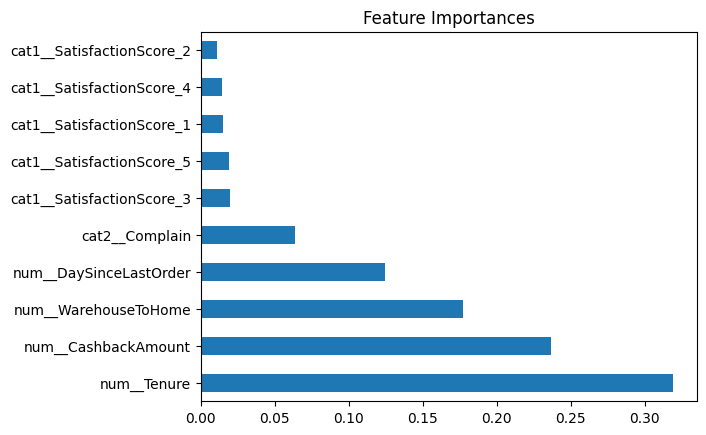

In [51]:
coef = pd.Series(rf_tuned['model'].feature_importances_, preproc.get_feature_names_out()).sort_values(ascending = False)
coef.plot(kind='barh', title='Feature Importances')
plt.show()

			**CONCLUSION:

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
	Features

Features used:
1. Tenure
2. WarehouseToHome
3. CashbackAmount
4. DaySinceLastOrder
5. Complain
6. SatisfactionScore
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
	Models

Models used for evaluation are:
1. RF		
2. SVC		
3. Tree
4. LR		
5. k-NN	

Top two models set after benchmarking are: 
RF
SVC
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
	Metrics

1. Accuracy
2. Precision
3. Recall
4. F1

One of the metrics that is focused the most is Accuracy to minimize errors.
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
	Sampling

1. Before Undersampling
2. After Undersampling 

Under Sampling Benchmarked Models is used for training and testing.
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
	Hyper Parameter Tuning

Before Tuned:
Benchmarked Model	Accuracy
0	RF	0.854167

After Tuned:
Tuned Model	Accuracy
0	RF	0.9125

There's a slight improvement between before and after tuning process.
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
Top 3 Significant Features

1. Tenure
2. Cashback
3. WarehouseToHome

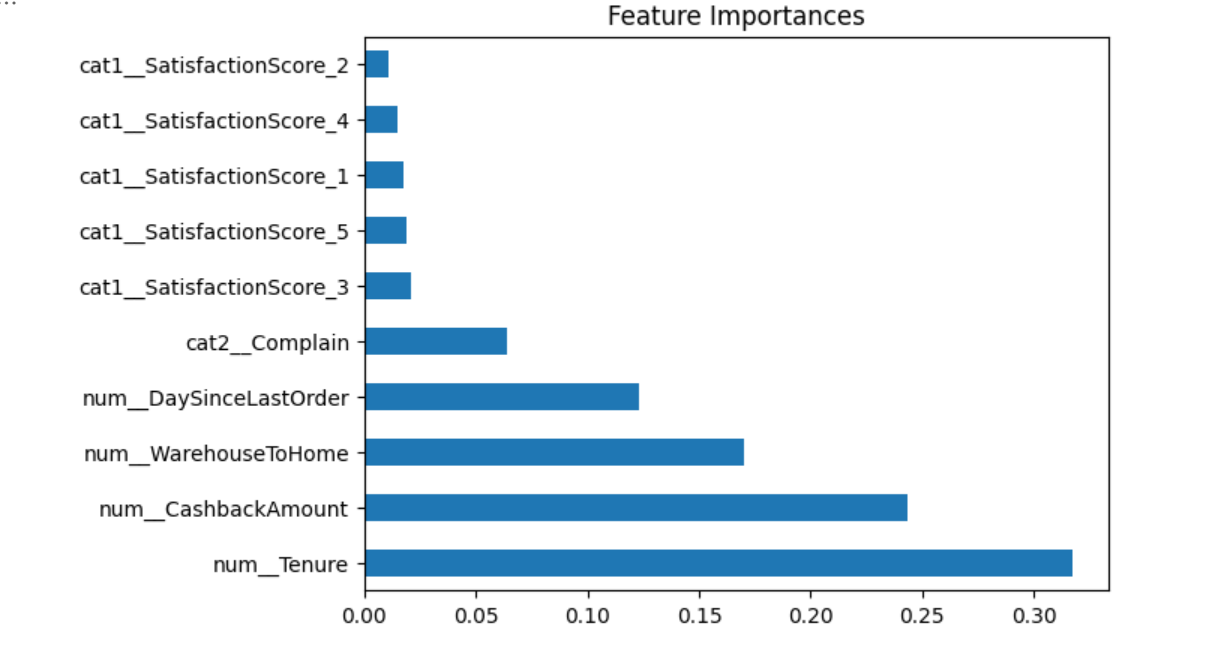
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------

The classification model with the Accuracy metrics and selected features combined, will allow e-commerce company to determine and do action to keep and prevent customers' churn.

            RECOMMENDATION

The following recommendations can be done to improve the models further more:

1. Model Selection and Tuning:
Try different machine learning algorithms like GBM, XGBoost, or neural networks.
Use advanced tuning methods to find the best model settings efficiently.

2. Feature Importance:
Explore the data thoroughly to find new features that predict churn.
Use both existing knowledge and external data to make feature sets richer and capture more customer behaviors.

3. Model Evaluation:
Use advanced evaluation techniques like ROC curves and AUC scores for comprehensive assessment.
Deal with imbalanced data by using advanced sampling methods like oversampling or SMOTE.

4. Sampling:
Test both undersampling and oversampling techniques to handle class imbalances and choose the best one.
Use stratified sampling to make sure training and evaluation subsets represent the whole dataset.

5. Continued Improvement:
Try ensemble methods like stacking and boosting to improve model performance.
Monitor model performance regularly and adapt to changes in business and customer behaviors.

6. Actionable Insights:
Communicate effectively between data scientists, business stakeholders, and marketing teams to use model insights for strategies.
Build automated systems to use predictive models for personalized customer engagement and retention efforts.